<a href="https://colab.research.google.com/github/Aswin-Kumar66/ml-practise/blob/main/Regression_with_an_Abalone_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
train = pd.read_csv('train.csv')


In [135]:
test = pd.read_csv('test.csv')

In [91]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [92]:
test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [93]:
train.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [94]:
train.isnull()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
90610,False,False,False,False,False,False,False,False,False,False
90611,False,False,False,False,False,False,False,False,False,False
90612,False,False,False,False,False,False,False,False,False,False
90613,False,False,False,False,False,False,False,False,False,False


In [95]:
train = train.drop(80247)

In [96]:
train.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [97]:
print(train.shape)
train = train.drop_duplicates()
train.shape

(90614, 10)


(90614, 10)

In [98]:
train = train.drop('id' , axis = 1)

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90614 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90614 non-null  object 
 1   Length          90614 non-null  float64
 2   Diameter        90614 non-null  float64
 3   Height          90614 non-null  float64
 4   Whole weight    90614 non-null  float64
 5   Whole weight.1  90614 non-null  float64
 6   Whole weight.2  90614 non-null  float64
 7   Shell weight    90614 non-null  float64
 8   Rings           90614 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ MB


In [100]:
train.nunique()

Sex                  3
Length             156
Diameter           126
Height              90
Whole weight      3175
Whole weight.1    1799
Whole weight.2     979
Shell weight      1129
Rings               28
dtype: int64

In [101]:
train['Sex'].value_counts()

I    33093
M    31027
F    26494
Name: Sex, dtype: int64

<ipython-input-102-96c4e613210b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr() , cmap = 'coolwarm' , annot = True)


<Axes: >

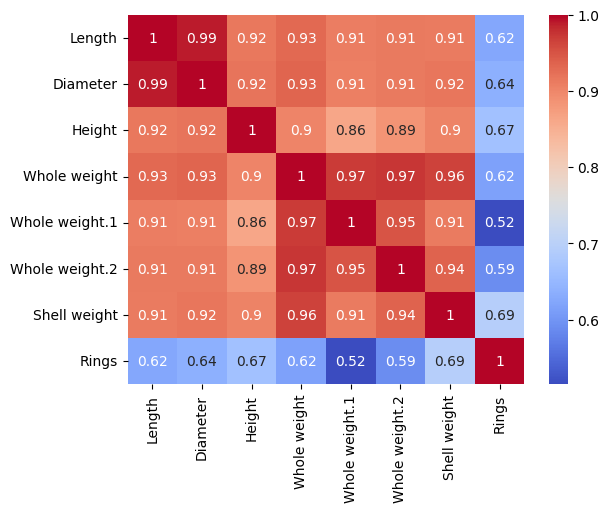

In [102]:
sns.heatmap(train.corr() , cmap = 'coolwarm' , annot = True)

In [103]:
train['Area']  = train.Length * train.Diameter
train['Volume']  = train.Length * train.Diameter * train.Height
train['Total whole weight'] = train['Whole weight']+train['Whole weight.1']+train['Whole weight.2']
train['Total weight'] = train['Whole weight']+train['Whole weight.1']+train['Whole weight.2'] + train['Shell weight']

<ipython-input-104-96c4e613210b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr() , cmap = 'coolwarm' , annot = True)


<Axes: >

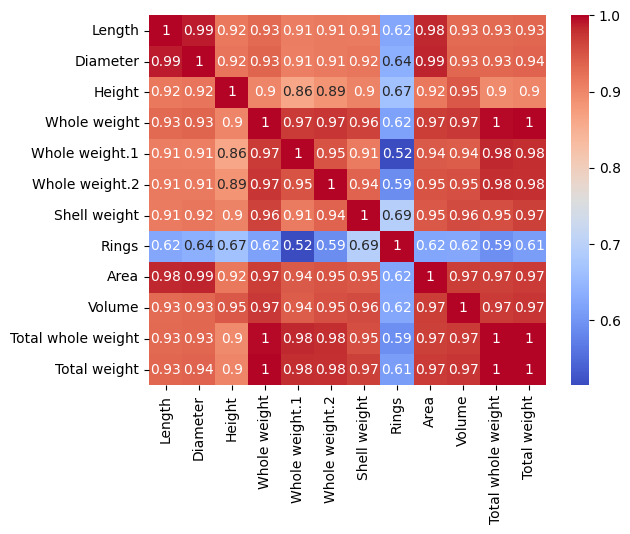

In [104]:
sns.heatmap(train.corr() , cmap = 'coolwarm' , annot = True)

In [105]:
col = ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings', 'Area', 'Volume',
       'Total whole weight', 'Total weight']

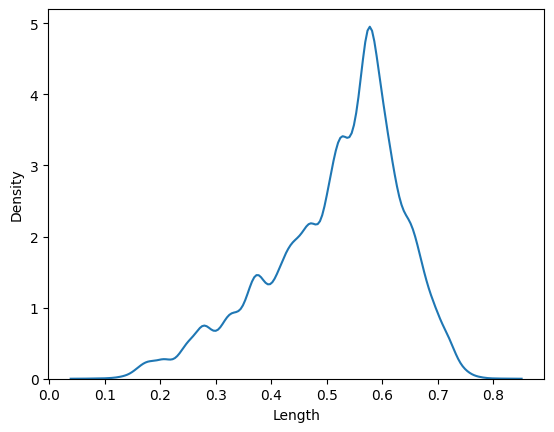

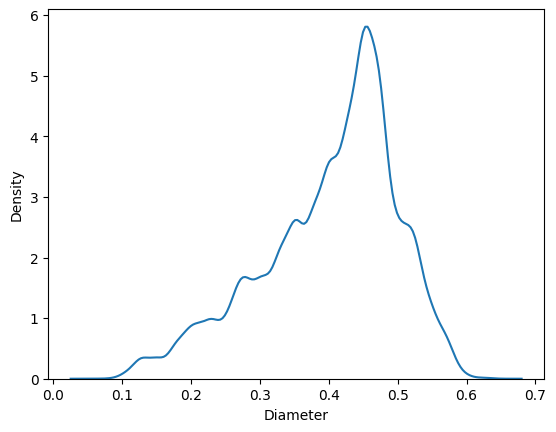

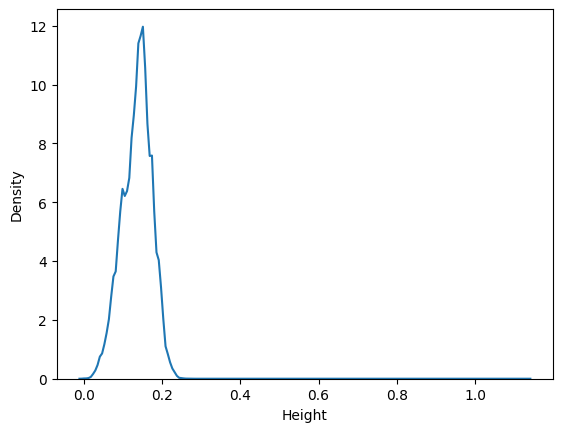

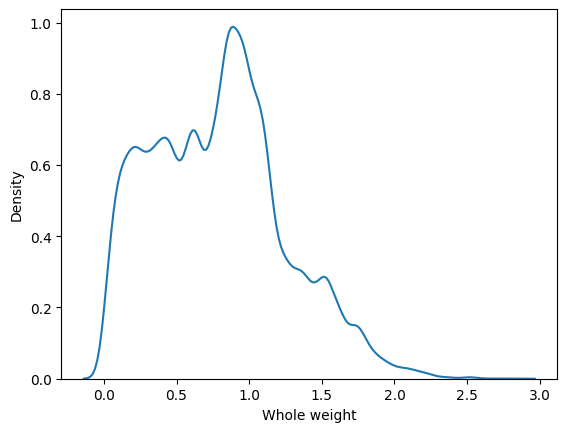

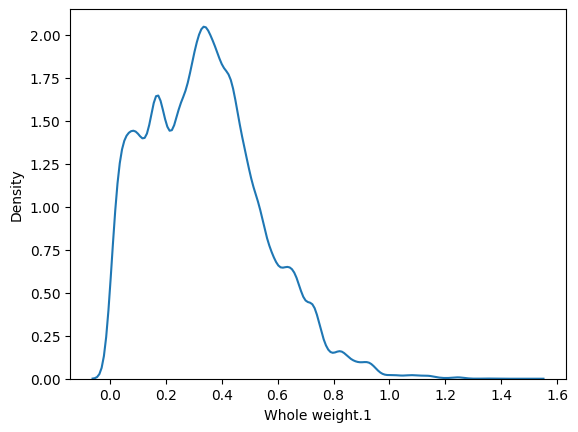

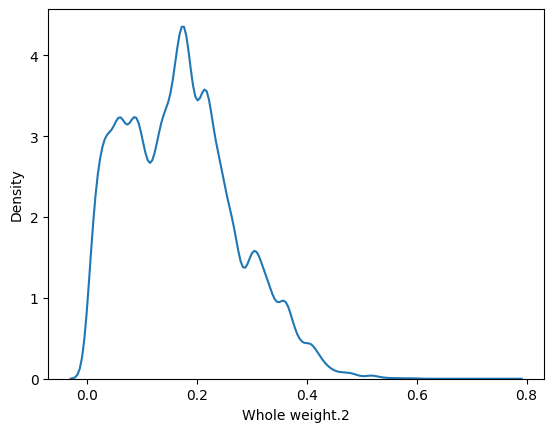

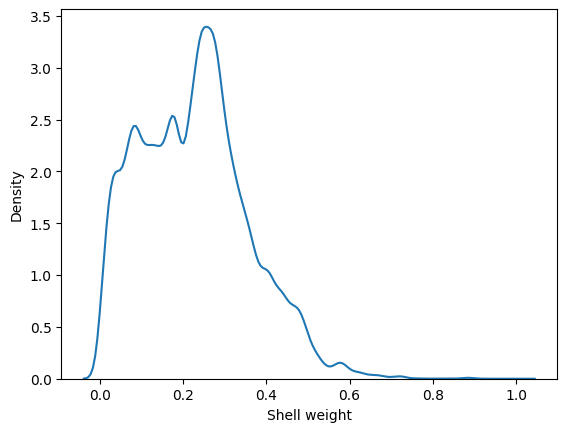

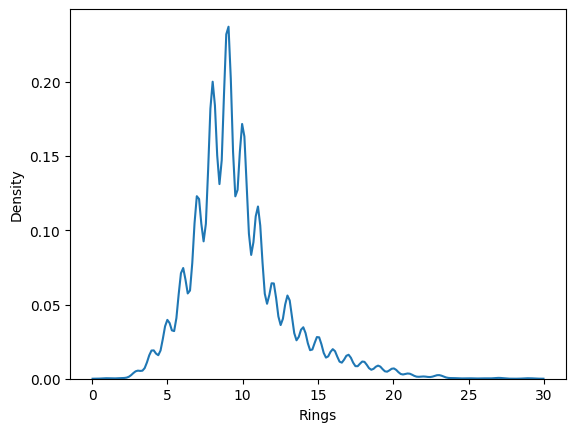

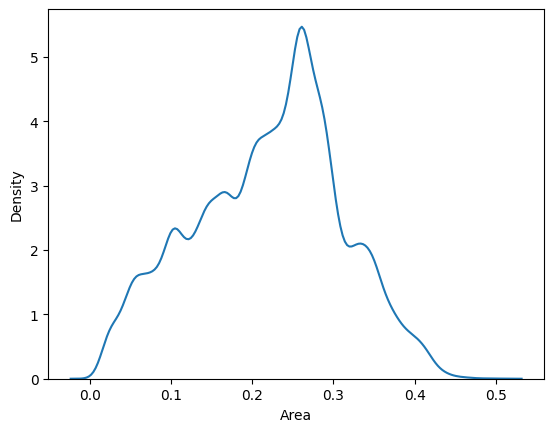

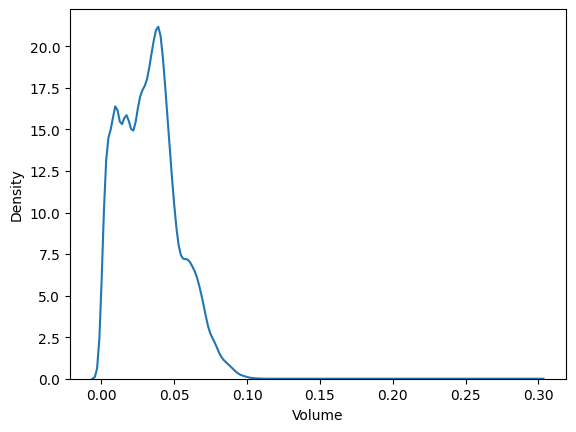

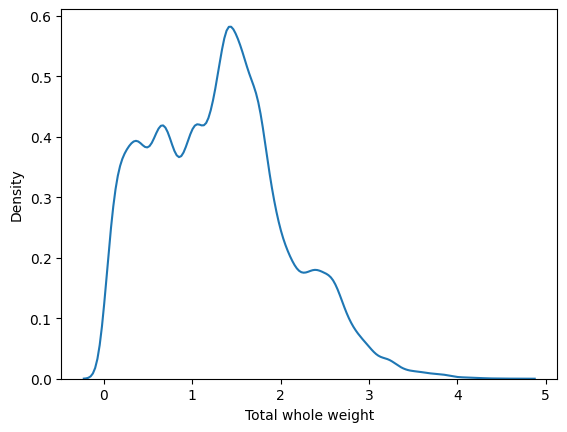

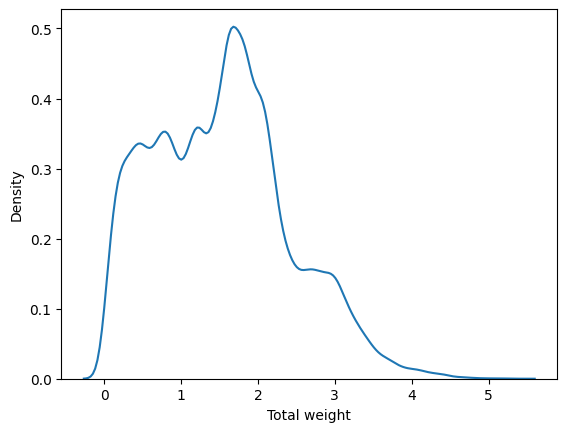

In [106]:
for i in col :
  sns.kdeplot(train[i])
  plt.show()

In [120]:
X = train.drop('Rings' , axis = 1)
y = train['Rings']

In [121]:
df = pd.get_dummies(X['Sex'])
X = pd.concat([X, df] , axis = 1)
X = X.drop('Sex'  , axis  = 1)
X

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Area,Volume,Total whole weight,Total weight,F,I,M
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,0.236500,0.035475,1.2465,1.4865,1,0,0
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,0.308700,0.044761,1.8645,2.1845,1,0,0
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,0.017600,0.000440,0.0295,0.0345,0,1,0
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,0.282625,0.042394,1.4955,1.7455,0,0,1
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,0.235875,0.030664,1.3115,1.5090,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90610,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,0.078725,0.005904,0.2640,0.3090,0,0,1
90611,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,0.235875,0.035381,1.4470,1.6870,0,0,1
90612,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,0.143550,0.013637,0.5510,0.6325,0,1,0
90613,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,0.093150,0.006986,0.3470,0.4170,0,1,0


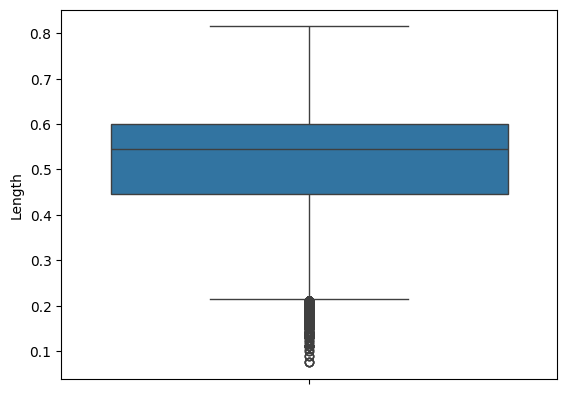

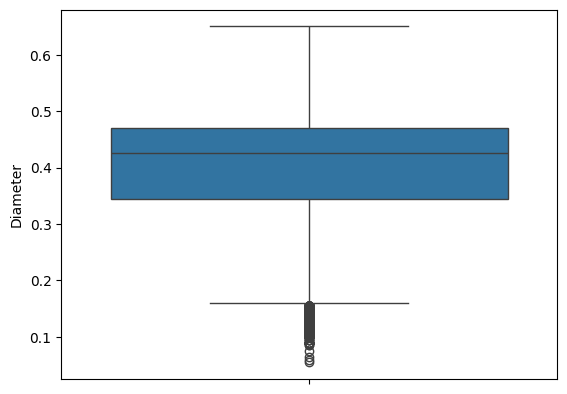

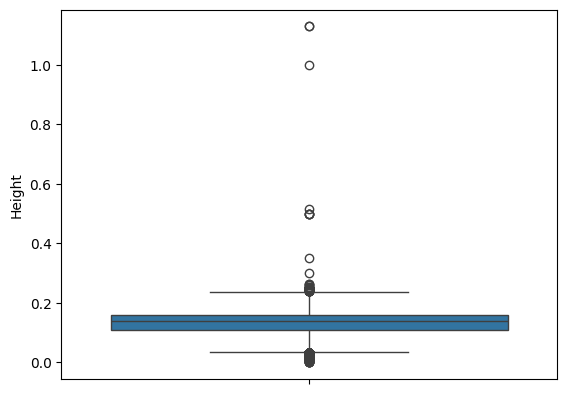

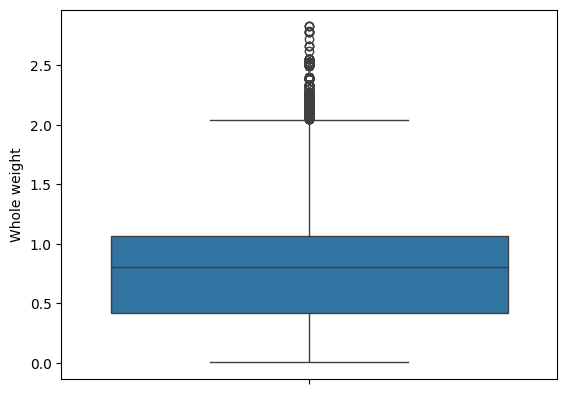

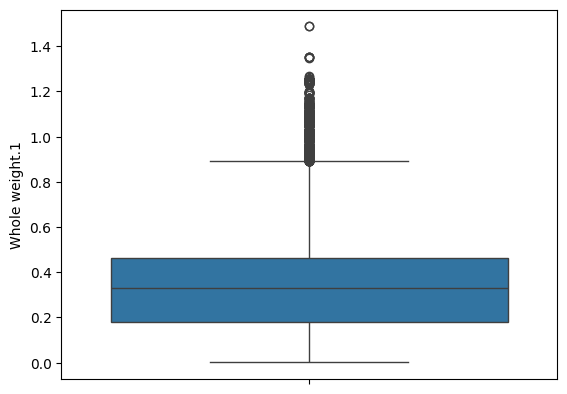

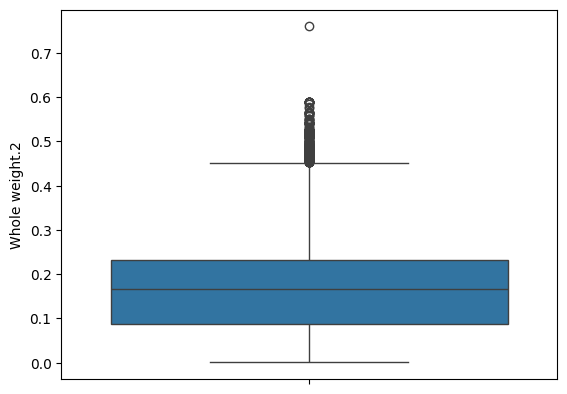

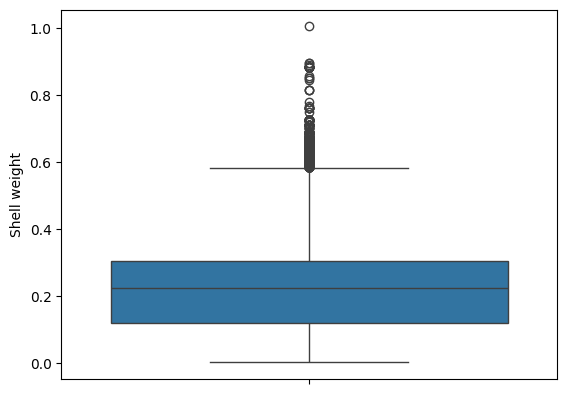

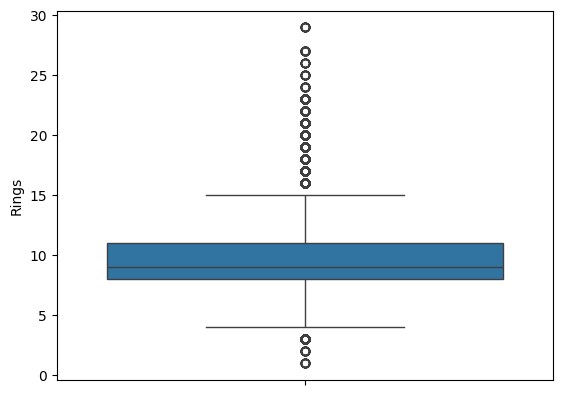

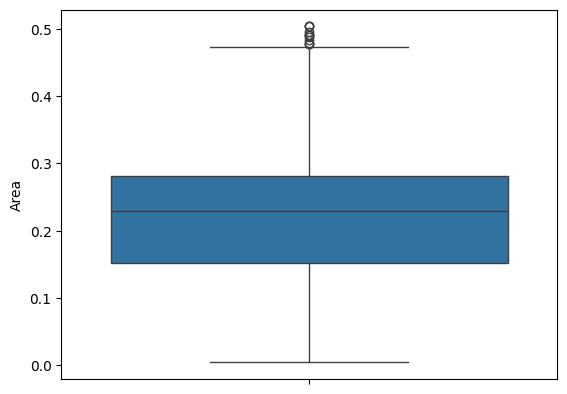

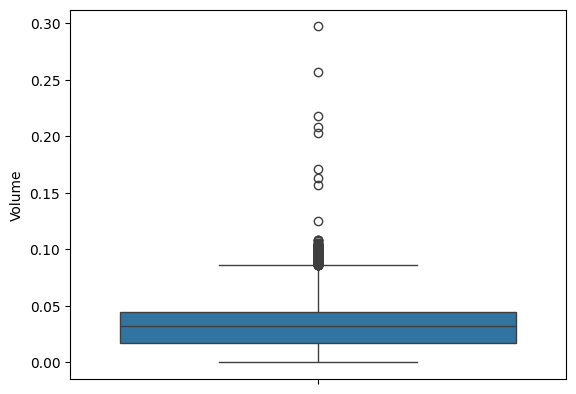

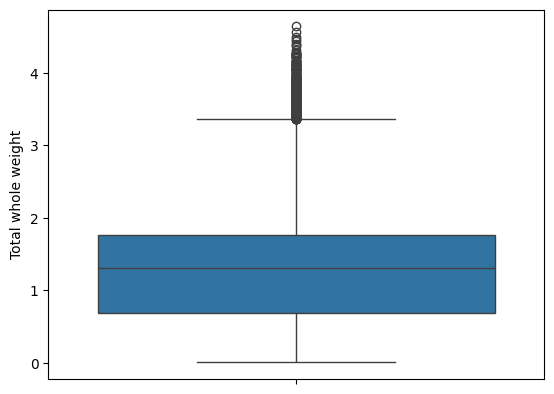

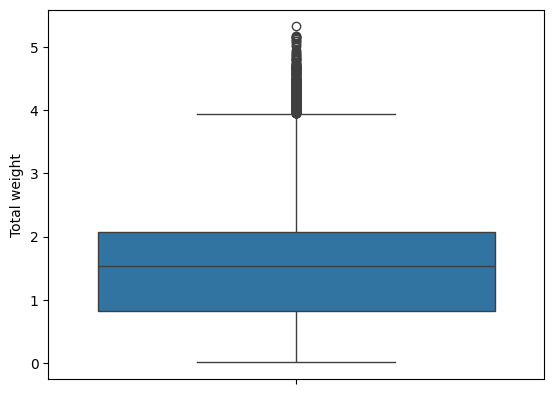

In [122]:
for i in col :
  sns.boxplot(train[i])
  plt.show()

In [125]:
def remove_outliers_replace(data, columns, threshold=1.5):
    data_no_outliers = data.copy()

    for column in columns:
        Q1 = data_no_outliers[column].quantile(0.25)
        Q3 = data_no_outliers[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        data_no_outliers[column] = np.where(data_no_outliers[column] < lower_bound , lower_bound , data_no_outliers[column] )
        data_no_outliers[column] = np.where(data_no_outliers[column] > upper_bound , upper_bound , data_no_outliers[column])

    return data_no_outliers

# columns  = ['Age' , 'Credit']
X = remove_outliers_replace(X, X.columns)

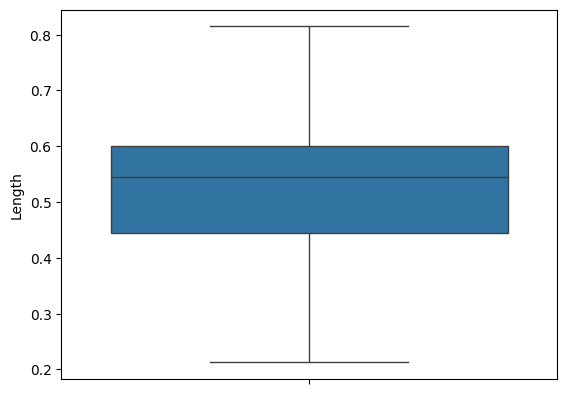

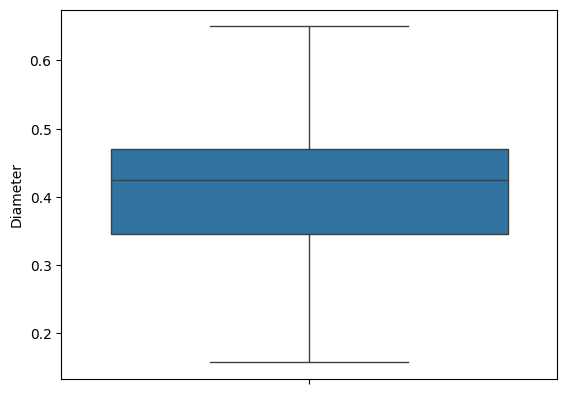

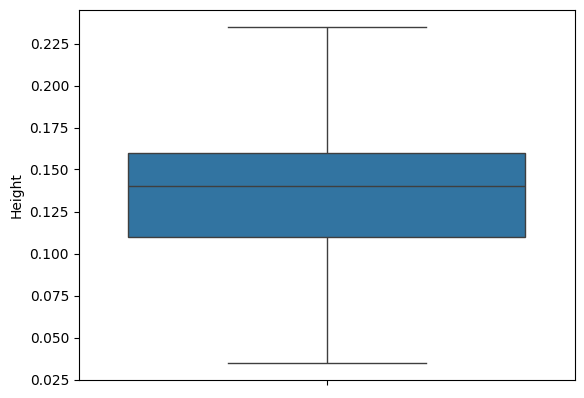

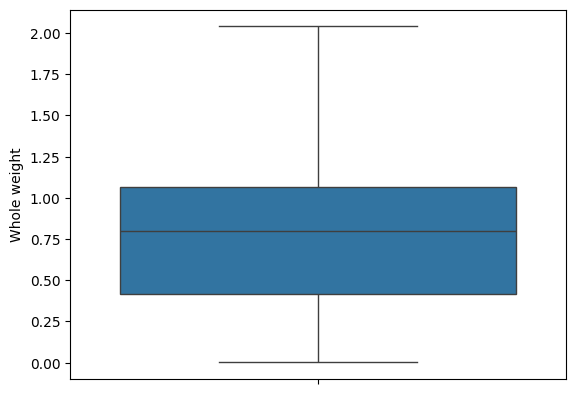

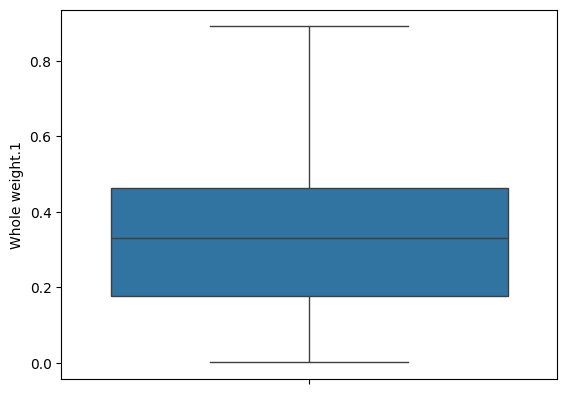

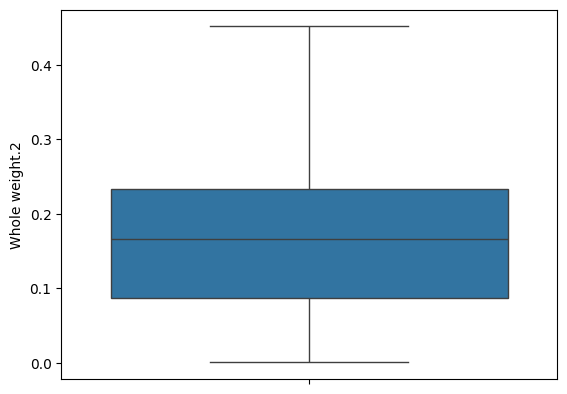

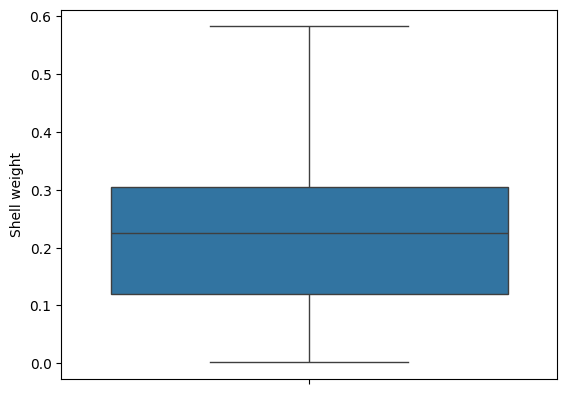

KeyError: 'Rings'

In [126]:
for i in col :
  sns.boxplot(X[i])
  plt.show()

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s = scaler.fit(X)
X = s.transform(X)


In [128]:
X

array([[ 0.27737641,  0.2879209 ,  0.38910509, ...,  1.55568975,
        -0.75849873, -0.72159603],
       [ 0.96217611,  0.90729711,  0.25543953, ...,  1.55568975,
        -0.75849873, -0.72159603],
       [-2.61162232, -2.52507941, -2.68520284, ..., -0.64280169,
         1.31839378, -0.72159603],
       ...,
       [-0.70702316, -0.74437279, -1.08121609, ..., -0.64280169,
         1.31839378, -0.72159603],
       [-1.47742282, -1.36374901, -1.61587834, ..., -0.64280169,
         1.31839378, -0.72159603],
       [-0.79262312, -0.79598748, -0.94755053, ..., -0.64280169,
         1.31839378, -0.72159603]])

In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
def rmsle(y_true, y_pred, convertExp=True):
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))

    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

In [131]:
from sklearn.linear_model import LinearRegression, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import  sklearn.metrics as sm
models = [LinearRegression(), XGBRegressor() , LGBMRegressor() , RandomForestRegressor(n_estimators = 30) , DecisionTreeRegressor() ]

for model in models :
  model.fit(X_train , y_train)
  pred = model.predict(X_test)
  print(rmsle(y_test , pred))



1.95518174203483
1.8663990293438553
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010416 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2310
[LightGBM] [Info] Number of data points in the train set: 72491, number of used features: 14
[LightGBM] [Info] Start training from score 9.699052
1.8500064901486108
1.9052476663634101
2.6298111740337173


In [152]:
from sklearn.model_selection import KFold
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5, log=True),
        'gamma': trial.suggest_float('gamma', 1e-3, 1, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 1, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        "min_child_weight": trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1, log=True)
    }

    cv = KFold(n_splits=5, shuffle=True, random_state=27)

    scores = []
    for train_idx, valid_idx in cv.split(X, y):
        X_train_fold, X_valid_fold = X[train_idx], X[valid_idx]
        y_train_fold, y_valid_fold = y.iloc[train_idx], y.iloc[valid_idx]

        model = XGBRegressor(**params, random_state=27)
        model.fit(X_train_fold, y_train_fold)

        y_pred = model.predict(X_valid_fold)
        score = np.sqrt(sm.mean_squared_log_error(y_valid_fold, y_pred))

        scores.append(score)

    return np.mean(scores)

In [150]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.3 MB/s eta 0:00:00


In [153]:
import optuna
study = optuna.create_study(direction='minimize', study_name="XGBRegressor")
study.optimize(objective, n_trials=100, n_jobs=-1)

[I 2024-04-01 11:23:59,273] A new study created in memory with name: XGBRegressor
[I 2024-04-01 11:24:25,945] Trial 0 finished with value: 0.15246071471555908 and parameters: {'n_estimators': 192, 'learning_rate': 0.12804578848583978, 'gamma': 0.0030990481700295933, 'reg_alpha': 0.35093280476853156, 'reg_lambda': 0.001647391417604413, 'max_depth': 10, 'min_child_weight': 7, 'subsample': 0.9599949371389193, 'colsample_bytree': 0.8344407724752592}. Best is trial 0 with value: 0.15246071471555908.
[I 2024-04-01 11:24:31,366] Trial 1 finished with value: 0.1510424809663036 and parameters: {'n_estimators': 521, 'learning_rate': 0.1265246005264382, 'gamma': 0.0011256138736957608, 'reg_alpha': 0.47946169439386127, 'reg_lambda': 0.007230689828526272, 'max_depth': 6, 'min_child_weight': 8, 'subsample': 0.913687042606719, 'colsample_bytree': 0.906451522000332}. Best is trial 1 with value: 0.1510424809663036.
[I 2024-04-01 11:24:38,418] Trial 2 finished with value: 0.15064779263234912 and paramet

In [154]:
best_params = study.best_params

In [155]:
model = XGBRegressor(**best_params)
model.fit(X , y )

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.669759400329302, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.0047583523886177885,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.010076189671593733,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=6, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=835, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [136]:
test['Area']  = test.Length * test.Diameter
test['Volume']  = test.Length * test.Diameter * test.Height
test['Total whole weight'] = test['Whole weight']+test['Whole weight.1']+test['Whole weight.2']
test['Total weight'] = test['Whole weight']+test['Whole weight.1']+test['Whole weight.2'] + test['Shell weight']

In [137]:
df1 = pd.get_dummies(test['Sex'])
test = pd.concat([test, df1] , axis = 1)
test = test.drop('Sex'  , axis  = 1)
test

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Area,Volume,Total whole weight,Total weight,F,I,M
0,90615,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,0.306375,0.047488,2.1690,2.4695,0,0,1
1,90616,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,0.266800,0.042688,1.6810,1.9560,0,0,1
2,90617,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,0.235200,0.032928,1.3765,1.6170,0,0,1
3,90618,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,0.279300,0.040498,1.4130,1.6480,0,0,1
4,90619,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,0.134875,0.014836,0.5825,0.6875,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60406,151021,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500,0.089700,0.007625,0.2775,0.3275,0,1,0
60407,151022,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050,0.215250,0.031211,1.4000,1.6050,1,0,0
60408,151023,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650,0.259600,0.040238,1.7150,1.9800,0,1,0
60409,151024,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350,0.346500,0.065835,2.4395,2.8745,1,0,0


In [138]:
test = test.drop('id' , axis = 1)

In [139]:
test = remove_outliers_replace(test, test.columns)

In [140]:
test = s.transform(test)

In [141]:
test

array([[ 1.09057606,  0.75245306,  0.52277065, ..., -0.64280169,
        -0.75849873,  1.38581695],
       [ 0.5341763 ,  0.59760901,  0.65643622, ..., -0.64280169,
        -0.75849873,  1.38581695],
       [ 0.36297638,  0.18469153,  0.12177397, ..., -0.64280169,
        -0.75849873,  1.38581695],
       ...,
       [ 0.61977626,  0.39115027,  0.52277065, ..., -0.64280169,
         1.31839378, -0.72159603],
       [ 1.218976  ,  1.2685999 ,  1.45842959, ...,  1.55568975,
        -0.75849873, -0.72159603],
       [-0.74982314, -0.64114342, -0.41288828, ...,  1.55568975,
        -0.75849873, -0.72159603]])

In [156]:
pred = model.predict(test)
pd.DataFrame(pred).to_csv('f.csv')